In [2]:
# Importing all prequisites

In [2]:
import requests, json, pandas as pd, numpy as np

In [1]:
!pip install world-bank-data

  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11111 sha256=1c4ba6c057d45374bbba33771ceb21ccbcac4cce6efbf62b8528d17506ca591d
  Stored in directory: /root/.cache/pip/wheels/95/74/5e/c32dde16dc1ef8d8e9cf134ac93ae723ffec4f60be9c4873f5
Successfully built world-bank-data


In [3]:
import world_bank_data as wb

In [4]:
#Creating data frame of countries and their gdp per capita in regular terms
df1 = pd.DataFrame(wb.get_series('NY.GDP.PCAP.CD'))

In [ ]:
#Checking df
df1

NY.GDP.PCAP.CD
Country                     Series                       Year                
Africa Eastern and Southern GDP per capita (current US$) 1960      147.507808
                                                         1961      146.910907
                                                         1962      156.078705
                                                         1963      182.115000
                                                         1964      162.232750
...                                                                       ...
Zimbabwe                    GDP per capita (current US$) 2016     1464.588957
                                                         2017     1235.189032
                                                         2018     1254.642265
                                                         2019     1316.740657
                                                         2020     1214.509820

[16226 rows x 1 columns]

In [ ]:
df1.head(5)

NY.GDP.PCAP.CD
Country                     Series                       Year                
Africa Eastern and Southern GDP per capita (current US$) 1960      147.507808
                                                         1961      146.910907
                                                         1962      156.078705
                                                         1963      182.115000
                                                         1964      162.232750

In [5]:
# Creating dataframe 2 of countries and GDP per capita in PPP terms
df2= pd.DataFrame(wb.get_series('NY.GDP.PCAP.PP.CD'))

In [ ]:
# Attempt number 1 of trying to join the dataframes, which lead to some NaN values
pd.concat([df1,df2], axis=1)

NY.GDP.PCAP.CD  NY.GDP.PCAP.PP.CD
Country     Series                                        Year                                   
Afghanistan GDP per capita (current US$)                  1960       59.773234                NaN
                                                          1961       59.860900                NaN
                                                          1962       58.458009                NaN
                                                          1963       78.706429                NaN
                                                          1964       82.095307                NaN
...                                                                        ...                ...
Zimbabwe    GDP per capita, PPP (current international $) 2016             NaN        2806.469032
                                                          2017             NaN        3795.642431
                                                          2018             NaN        4017.221716
                                                          2019             NaN        3783.547898
                                                          2020             NaN        3536.034132

[32452 rows x 2 columns]

In [3]:
# Attempt number 2 of merging dataframes, was successfully able to merge based on columns I wanted to be matching which were country and year
merged_df = df1.merge(df2, how = 'inner', on = ['Country', 'Year'],)

NameError: ignored

In [ ]:
#Checking new dataframe
merged_df

NY.GDP.PCAP.CD  NY.GDP.PCAP.PP.CD
Country                     Year                                   
Africa Eastern and Southern 1960      147.507808                NaN
                            1961      146.910907                NaN
                            1962      156.078705                NaN
                            1963      182.115000                NaN
                            1964      162.232750                NaN
...                                          ...                ...
Zimbabwe                    2016     1464.588957        2806.469032
                            2017     1235.189032        3795.642431
                            2018     1254.642265        4017.221716
                            2019     1316.740657        3783.547898
                            2020     1214.509820        3536.034132

[16226 rows x 2 columns]

In [ ]:
#Adding dataframe to csv file and saving
merged_df.to_csv("mergedgdp.csv")

In [20]:
from google.colab import files


In [ ]:
files.download("mergedgdp.csv")

In [11]:
# Building happiness Dataframe
requests.get('https://world-happiness-database.herokuapp.com/api/happiness')

<Response [200]>

In [12]:
html=requests.get("https://world-happiness-database.herokuapp.com/api/happiness")

In [ ]:
html.json()

In [14]:
data=html.json()

In [ ]:
data[1]

In [16]:
happinessdf=pd.DataFrame(data)

In [17]:
#Checking df
happinessdf

,country,happiness,lat,lon,year
0,Afghanistan,2.694,33.939110,67.709953,2018
1,Albania,5.004,41.153332,20.168331,2018
2,Algeria,5.043,28.033886,1.659626,2018
3,Angola,3.795,-11.202692,17.873887,2014
4,Argentina,5.793,-38.416097,-63.616672,2018
...,...,...,...,...,...
150,Venezuela,5.006,6.423750,-66.589730,2018
151,Vietnam,5.296,14.058324,108.277199,2018
152,Yemen,3.058,15.552727,48.516388,2018
153,Zambia,4.041,-13.133897,27.849332,2018


In [7]:
#Checking merged df again
merged_df


NY.GDP.PCAP.CD  NY.GDP.PCAP.PP.CD
Country                     Year                                   
Africa Eastern and Southern 1960      147.507808                NaN
                            1961      146.910907                NaN
                            1962      156.078705                NaN
                            1963      182.115000                NaN
                            1964      162.232750                NaN
...                                          ...                ...
Zimbabwe                    2016     1464.588957        2806.469032
                            2017     1235.189032        3795.642431
                            2018     1254.642265        4017.221716
                            2019     1316.740657        3783.547898
                            2020     1214.509820        3536.034132

[16226 rows x 2 columns]

In [ ]:
#Merged dataframe included data for continents etc which I didn't need so after inspecting the initial CSV I removed this data

In [8]:
merged_df=merged_df.iloc[2989:,:]

In [ ]:
#Saving new merged df
merged_df.to_csv("countriesonlydata.csv")

In [ ]:
files.download("countriesonlydata.csv")

In [18]:
#Saving happiness data
happinessdf.to_csv("happinessdata.csv")

In [9]:
#Creating seperate dataframes for PPP based GDP per capita and regular GDP per capita 
# Reducing amount of data lost if I were to dropna from merged df
gdpPPP_df=merged_df.drop("NY.GDP.PCAP.CD",axis=1).dropna()

In [ ]:
gdpPPP_df.to_csv("gdpDataPPP.csv")

In [ ]:
files.download("gdpDataPPP.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
gdp_df=merged_df.drop("NY.GDP.PCAP.PP.CD",axis=1).dropna()

In [22]:
files.download("happinessdata.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
#Renaming columns so I can merge happiness data with GDP data by country and year
happinessdf.columns=['Country','Happiness','Lat','Lon','Year']

In [26]:
happinessdf

,Country,Happiness,Lat,Lon,Year
0,Afghanistan,2.694,33.939110,67.709953,2018
1,Albania,5.004,41.153332,20.168331,2018
2,Algeria,5.043,28.033886,1.659626,2018
3,Angola,3.795,-11.202692,17.873887,2014
4,Argentina,5.793,-38.416097,-63.616672,2018
...,...,...,...,...,...
150,Venezuela,5.006,6.423750,-66.589730,2018
151,Vietnam,5.296,14.058324,108.277199,2018
152,Yemen,3.058,15.552727,48.516388,2018
153,Zambia,4.041,-13.133897,27.849332,2018


In [27]:
#Merge with happiness for regular GDP per capita
gdphappinessmerged_df= gdp_df.merge(happinessdf, how = 'inner', on = ['Country', 'Year'],)

In [28]:
gdphappinessmerged_df

,Country,Year,NY.GDP.PCAP.CD,Happiness,Lat,Lon
0,Afghanistan,2018,485.668419,2.694,33.939110,67.709953
1,Albania,2018,5287.663694,5.004,41.153332,20.168331
2,Algeria,2018,4142.018558,5.043,28.033886,1.659626
3,Angola,2014,5408.411700,3.795,-11.202692,17.873887
4,Argentina,2018,11795.159387,5.793,-38.416097,-63.616672
...,...,...,...,...,...,...
137,Uruguay,2018,18703.860292,6.372,-32.522779,-55.765835
138,Uzbekistan,2018,1597.068337,6.205,41.377491,64.585262
139,Vietnam,2018,2566.447487,5.296,14.058324,108.277199
140,Zambia,2018,1516.368371,4.041,-13.133897,27.849332


In [29]:
#Merging happiness with PPP based GDP per capita
gdpPPPhappinessmerged_df= gdpPPP_df.merge(happinessdf, how = 'inner', on = ['Country', 'Year'],)

In [30]:
gdpPPPhappinessmerged_df

,Country,Year,NY.GDP.PCAP.PP.CD,Happiness,Lat,Lon
0,Afghanistan,2018,2082.635648,2.694,33.939110,67.709953
1,Albania,2018,13554.898948,5.004,41.153332,20.168331
2,Algeria,2018,11909.929825,5.043,28.033886,1.659626
3,Angola,2014,8179.297828,3.795,-11.202692,17.873887
4,Argentina,2018,23293.398634,5.793,-38.416097,-63.616672
...,...,...,...,...,...,...
135,Uruguay,2018,23588.151390,6.372,-32.522779,-55.765835
136,Uzbekistan,2018,7252.985197,6.205,41.377491,64.585262
137,Vietnam,2018,7768.080218,5.296,14.058324,108.277199
138,Zambia,2018,3606.097632,4.041,-13.133897,27.849332


In [31]:
import seaborn as sns

In [32]:
import matplotlib.pyplot as plt

In [33]:
gdpPPPhappinessmerged_df.to_csv("PPPvsHappiness.csv")

In [34]:
gdphappinessmerged_df.to_csv("GDPvsHappiness.csv")

In [36]:
files.download("GDPvsHappiness.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
files.download("PPPvsHappiness.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#Imported matplotlib and sns, now going to run regression of happiness against GDP per capita
sns.regplot(x="NY.GDP.PCAP.CD",y="Happiness",data=gdphappinessmerged_df,)
plt.xlabel("GDP Per Capita(Current USD)")

NameError: ignored

In [43]:
from scipy.stats import linregress

In [44]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=gdphappinessmerged_df.dropna()['NY.GDP.PCAP.CD'], y=gdphappinessmerged_df.dropna()['Happiness'])

In [45]:
#Calculating cofficient and R square value
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.0  * x +  4.99
R² =  0.51


Text(0.5, 0, 'GDP Per Capita PPP Based(Current USD)')

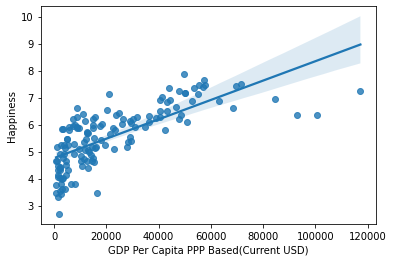

In [49]:
#Creating regression of happiness against GDP per capita PPP based
sns.regplot(x="NY.GDP.PCAP.PP.CD",y="Happiness",data=gdpPPPhappinessmerged_df,)
plt.xlabel("GDP Per Capita PPP Based(Current USD)")

In [51]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=gdpPPPhappinessmerged_df.dropna()['NY.GDP.PCAP.PP.CD'], y=gdpPPPhappinessmerged_df.dropna()['Happiness'])

In [52]:
#Calculating coefficient and r square value
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.0  * x +  4.76
R² =  0.53


In [ ]:
#Regressions were saved as png directly using right click.